In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

drive.mount('/content/drive')
cwd = os.getcwd()
print(cwd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


# 1. Проведение первичного анализа данных

## Изучение данных

In [25]:
df = pd.read_csv('drive/MyDrive/howpop_train.csv')
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

In [27]:
df.describe(include='object')

,url,domain,published,author,flow,title
count,134137,134137,134137,97657,97048,134137
unique,134137,2,130291,22077,6,133628
top,https://habrahabr.ru/post/18284/,habrahabr.ru,2011-06-14 15:52:00,@alizar,develop,"Интересные события, произошедшие в выходные"
freq,1,97048,39,5292,53318,56


In [28]:
df.isnull().sum()

url                     0
domain                  0
post_id                 0
published               0
author              36480
flow                37089
polling                 0
content_len             0
title                   0
comments                0
favs                    0
views                   0
votes_plus            571
votes_minus           571
views_lognorm           0
favs_lognorm            0
comments_lognorm        0
dtype: int64

## Обработка пропусков

Посмотрим на записи с неизвестным автором.

In [29]:
df[df.author.isnull()]

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
77,https://habrahabr.ru/company/usabilitylab/blog...,habrahabr.ru,18501,2008-01-10 05:54:00,NaN,misc,False,4097,Анатолий Костин. Эта непредсказуемая автоматика,135,8,1000,36.0,22.0,0.276830,0.257590,1.293633
119,https://habrahabr.ru/company/usabilitylab/blog...,habrahabr.ru,18615,2008-01-12 13:26:00,NaN,misc,False,28034,Анатолий Костин. Автоматизация и человек: мечт...,21,9,2300,19.0,8.0,0.931918,0.305422,-0.075910
187,https://habrahabr.ru/company/infostart/blog/18...,habrahabr.ru,18810,2008-01-16 14:21:00,NaN,misc,False,2967,10 фактов об ИНФОСТАРТ,12,5,3700,5.0,8.0,1.375671,-0.042232,-0.417029
578,https://habrahabr.ru/company/usabilitylab/blog...,habrahabr.ru,20066,2008-02-10 21:14:00,NaN,misc,False,13357,Дмитрий Сатин. Современные технологии usabilit...,1,12,3200,9.0,3.0,1.112200,0.287184,-2.160140
1525,https://habrahabr.ru/company/SECL_GROUP/blog/2...,habrahabr.ru,22811,2008-04-02 23:15:00,NaN,misc,False,24468,"Социальные сети, перспективы развития и способ...",38,83,13000,14.0,1.0,1.843231,1.380760,0.211471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134114,https://habrahabr.ru/company/badoo/blog/314046/,habrahabr.ru,314046,2016-10-31 17:28:00,NaN,develop,False,11687,"Как я сходил на первый в России «Testathon», х...",13,21,6200,29.0,2.0,-0.189307,-0.811428,0.170211
134117,https://geektimes.ru/company/hashflare/blog/28...,geektimes.ru,282082,2016-10-31 17:51:00,NaN,NaN,False,11453,Криптовалюты на выручку е-коммерсу: когда плат...,22,19,6300,18.0,5.0,-1.128984,-0.327353,-0.179382
134123,https://habrahabr.ru/company/miip/blog/313322/,habrahabr.ru,313322,2016-10-31 19:18:00,NaN,develop,False,8618,Реалии работы геймдизайнером в большой студии ...,7,61,11700,15.0,4.0,0.561677,0.288972,-0.252703
134125,https://habrahabr.ru/company/3cx/blog/314074/,habrahabr.ru,314074,2016-10-31 19:36:00,NaN,admin,False,4052,Выпущена 3CX Phone System V15 SP3 и интеграция...,2,6,865,7.0,1.0,-2.514194,-2.034175,-0.995433


Просмотрев несколько записей с неизвестным автором, можно заметить фигурирование компаний в url адресе.

In [30]:
def company_count(url):
  # Подсчет количества "company" в столбце url у неизвестных авторов
  url = url.replace('//', '/')
  return True if url.split('/')[2] == 'company' else False

df[df.author.isnull()]['url'].apply(company_count).sum() # Все неизвестные авторы это сотрудники компаний ведущих свой блог на Хабре.

36480

После того как была найдена причина отсутсвия значений в столбце author, заполним пропущенные значения.

In [31]:
def company_from_url(url):
  # Функция для извлечения имени компании из url
  url = url.replace('//', '/')
  return url.split('/')[3]

df['company(temp)'] = df[df.author.isnull()]['url'].apply(company_from_url)
df.author.fillna(df['company(temp)'], inplace=True)
df.drop('company(temp)', axis=1, inplace=True)

df.author.isnull().sum()

0

Теперь все пропущенные значения заменены на имена компаний, под чьим блогом выходили посты на Хабре.

In [32]:
df.iloc[77] # Столбец author заполнен

url                 https://habrahabr.ru/company/usabilitylab/blog...
domain                                                   habrahabr.ru
post_id                                                         18501
published                                         2008-01-10 05:54:00
author                                                   usabilitylab
flow                                                             misc
polling                                                         False
content_len                                                      4097
title                 Анатолий Костин. Эта непредсказуемая автоматика
comments                                                          135
favs                                                                8
views                                                            1000
votes_plus                                                       36.0
votes_minus                                                      22.0
views_lognorm       

Посмотрим на записи с пропущенным значением flow.

In [33]:
df[df.flow.isnull()]

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356
6,https://geektimes.ru/post/18306/,geektimes.ru,18306,2008-01-03 12:55:00,@abbasov,NaN,False,435,Modbook в действии,10,0,301,5.0,1.0,-0.402140,-1.278643,-0.355525
10,https://geektimes.ru/post/18316/,geektimes.ru,18316,2008-01-04 00:48:00,@caxep,NaN,False,6553,Обзор «лаунчеров» под Windows,50,10,6300,19.0,3.0,3.085543,1.465403,0.812634
13,https://geektimes.ru/post/18328/,geektimes.ru,18328,2008-01-04 18:44:00,@suckdontbite,NaN,False,1698,Новые скриншоты Cairo Shell,22,7,653,19.0,3.0,0.445147,1.076779,0.183942
17,https://geektimes.ru/post/18333/,geektimes.ru,18333,2008-01-04 23:07:00,@agl666,NaN,False,1215,Чтение Википедии оффлайн,30,4,11100,11.0,1.0,3.561205,0.543635,0.415358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134121,https://geektimes.ru/post/282084/,geektimes.ru,282084,2016-10-31 18:58:00,@alizar,NaN,False,13083,Цифровой Хэллоуин 2016,16,9,10100,24.0,4.0,-0.448063,-1.131351,-0.411742
134122,https://geektimes.ru/post/282078/,geektimes.ru,282078,2016-10-31 19:05:00,@marks,NaN,False,5841,Люминесценция помогает ученым изучать работу о...,3,12,3200,13.0,0.0,-2.096896,-0.824413,-1.523025
134133,https://geektimes.ru/post/282086/,geektimes.ru,282086,2016-10-31 22:44:00,@marks,NaN,False,5504,Заработала система раннего предупреждения НАСА...,52,16,12900,22.0,0.0,-0.091464,-0.511814,0.465118
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,NaN,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0,0.198924,-0.656390,-0.408714


Не обнаружив ничего примечательного (все посты относятся к разным темам), можно заполнить пропущенные значения уже имеющейся категорией.

In [34]:
df.flow.unique() # misc переводится как "разное". Заполним пропущенные значения этой категорией.

array(['develop', 'design', nan, 'misc', 'management', 'admin',
       'marketing'], dtype=object)

In [35]:
df.flow.fillna('misc', inplace=True)
df.flow.isnull().sum()

0

Посмотрим на записи с пропущенными оценками.

In [36]:
df[df.votes_plus.isnull()]

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
3681,https://geektimes.ru/post/29257/,geektimes.ru,29257,2008-07-17 13:01:00,@clops,misc,False,652,Apple извиняется за неверную терминологию,11,0,166,NaN,NaN,-0.894579,-1.304480,-0.620518
3774,https://habrahabr.ru/post/29706/,habrahabr.ru,29706,2008-07-22 09:03:00,@bO_oblik,develop,False,8060,Меню «Гаражные двери»,102,133,660,NaN,NaN,-0.155343,1.712039,1.042406
3779,https://habrahabr.ru/post/29713/,habrahabr.ru,29713,2008-07-22 10:34:00,@badlittleduck,design,False,25643,"Успешный проект – проект, ориентированный на п...",65,128,1600,NaN,NaN,0.447362,1.687148,0.680229
3830,https://habrahabr.ru/post/30004/,habrahabr.ru,30004,2008-07-24 11:44:00,@dmitrysatin,design,False,3588,Юзабилити Бюллетень. Выпуск № 20,1,10,286,NaN,NaN,-0.681131,0.115950,-2.119212
3853,https://habrahabr.ru/post/30055/,habrahabr.ru,30055,2008-07-25 01:44:00,@mholub,develop,False,646,"Заметки о Ruby. №1. [[: key,: value], [: key2,...",7,4,337,NaN,NaN,-0.580207,-0.402772,-1.006187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51687,https://geektimes.ru/post/142989/,geektimes.ru,142989,2012-04-28 14:37:00,@veveve,misc,False,1178,ФАС разберется с нулевой пошлиной на iPad,106,9,1700,NaN,NaN,-0.450952,-0.628140,0.990019
52610,https://habrahabr.ru/post/144235/,habrahabr.ru,144235,2012-05-21 21:14:00,@tratotui,develop,False,4706,JavaScript для «маленьких». DOM (часть 3),41,273,11400,NaN,NaN,0.484975,1.255158,0.575637
55299,https://habrahabr.ru/post/147856/,habrahabr.ru,147856,2012-07-18 15:46:00,@faiwer,develop,False,24250,Sublime Text 2,284,1411,270000,NaN,NaN,2.886512,2.379988,2.098157
57393,https://habrahabr.ru/post/150654/,habrahabr.ru,150654,2012-09-06 11:33:00,@kibergus,develop,False,9889,Как правильно скопировать массив и при чем тут...,26,78,16700,NaN,NaN,0.516663,0.276541,0.260393


По какой то неизвестной причине оценки на определенных постах просто не указаны. Для того чтобы не загрязнить таблицу очевидно ошибочными данными (например оценок больше чем просмотров в целом), заполним пропуски нулями.

In [37]:
df.votes_plus.fillna(0, inplace=True)
df.votes_minus.fillna(0, inplace=True)
df.isnull().sum()

url                 0
domain              0
post_id             0
published           0
author              0
flow                0
polling             0
content_len         0
title               0
comments            0
favs                0
views               0
votes_plus          0
votes_minus         0
views_lognorm       0
favs_lognorm        0
comments_lognorm    0
dtype: int64

Говоря об очевидно ошибочных данных, стоит все таки проверить их существование.

In [38]:
delete_data = df[df['views'] < df['votes_plus'] + df['votes_minus']]
df.drop(delete_data.index, inplace=True)
print(f'Удалено {delete_data.shape[0]} записей')

Удалено 69 записей


## Построение графиков

Text(0.5, 1.0, 'Распределение комментариев')

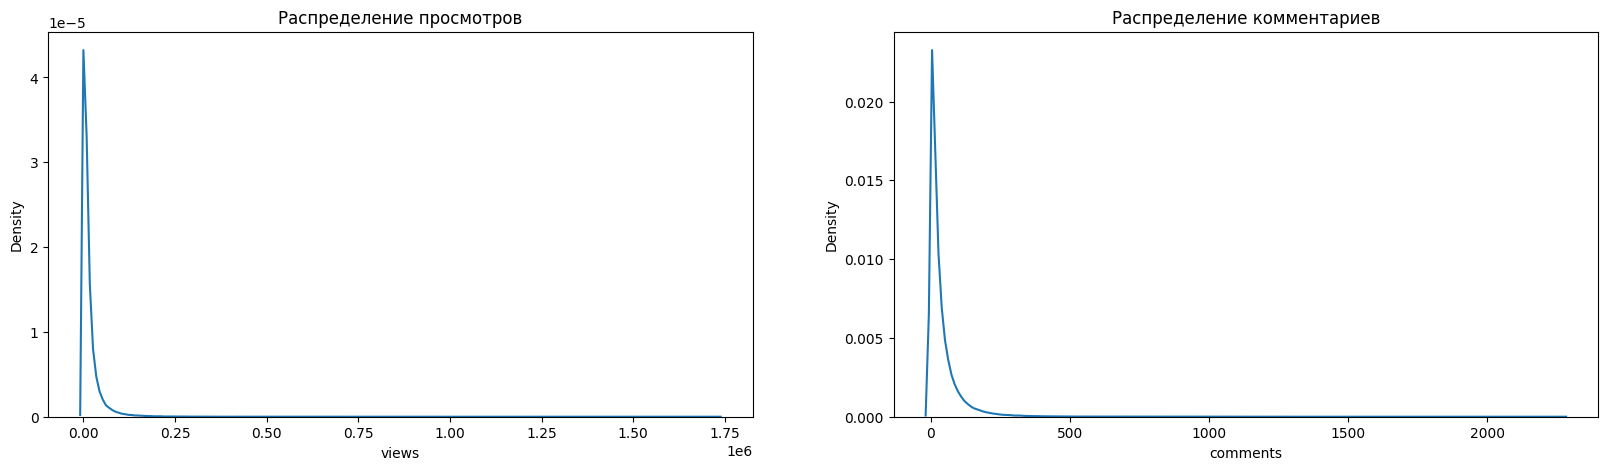

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.kdeplot(df, x='views', ax=axes[0]).set_title('Распределение просмотров')
sns.kdeplot(df, x='comments', ax=axes[1]).set_title('Распределение комментариев')

Как можно видеть из графиков выше, основная часть данных распределена относительно около нуля.

Text(0.5, 1.0, 'Количество постов по темам')

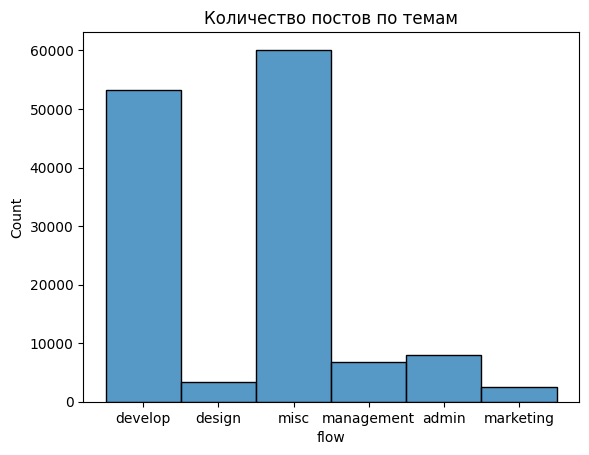

In [41]:
sns.histplot(df, x='flow').set_title('Количество постов по темам')

Из графика выше видно, что основными темами для постов являются "misc" и "develop". Так как записи с неизвестными темами заполнялись темой "misc" (разное), данная тема получила завышенную популярность.

Для создания информативных графиков, создадим таблицу, содержащую средние значения просмотров и комментариев за час.

In [42]:
df['hour'] = df['published'].apply(lambda x: int(x[11:13]))

a = df.groupby('hour').agg({'views': 'mean', 'comments': 'mean'}).reset_index()
a

,hour,views,comments
0,0,17564.035092,48.273374
1,1,17717.709114,49.417910
2,2,17328.690581,48.827025
3,3,18393.415810,53.133033
4,4,20753.200730,53.588504
5,5,17238.800000,47.642353
6,6,21354.310115,51.799618
7,7,19106.978427,43.216423
8,8,16014.419048,36.772222
9,9,16926.671292,37.280759


Text(0.5, 1.0, 'Среднее количество комментариев в определенное время суток')

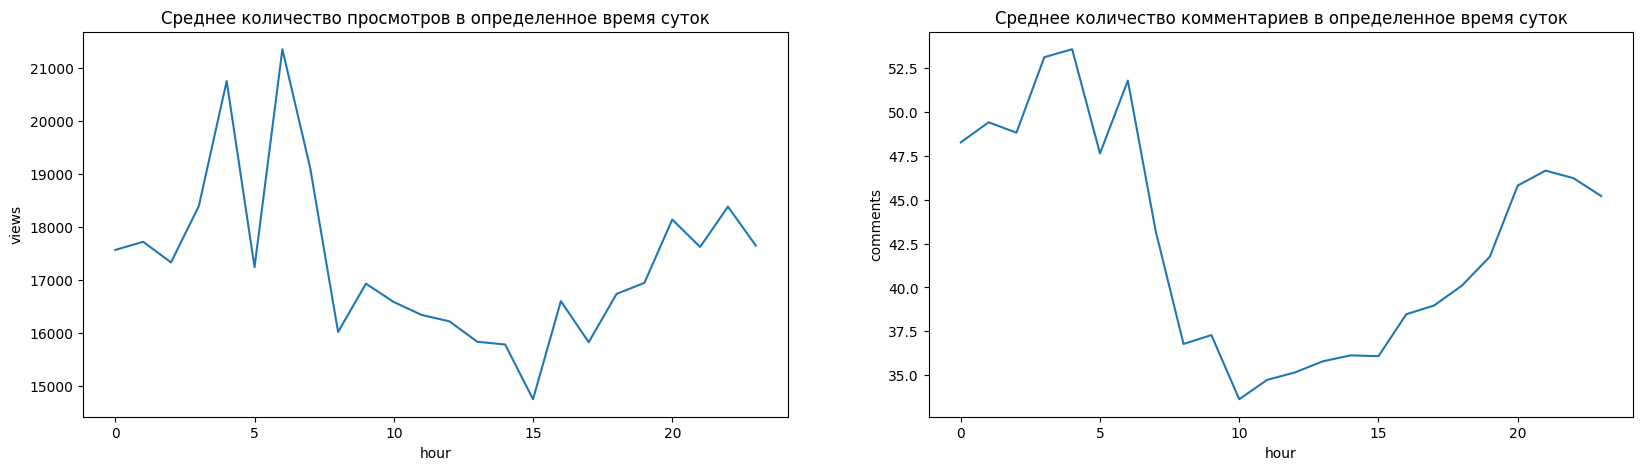

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.lineplot(a, x='hour', y='views', ax=axes[0]).set_title('Среднее количество просмотров в определенное время суток')
sns.lineplot(a, x='hour', y='comments', ax=axes[1]).set_title('Среднее количество комментариев в определенное время суток')


Из графиков выше можно наблюдать наибольшую и наименьшую активность пользователей относительно времени создания поста. (Наибольшее количество просмотров получали посты, выложенные в 6 утра, а наибольшее количество комментариев - в 4.)

Text(0.5, 1.0, 'Распределение средних значений комментариев')

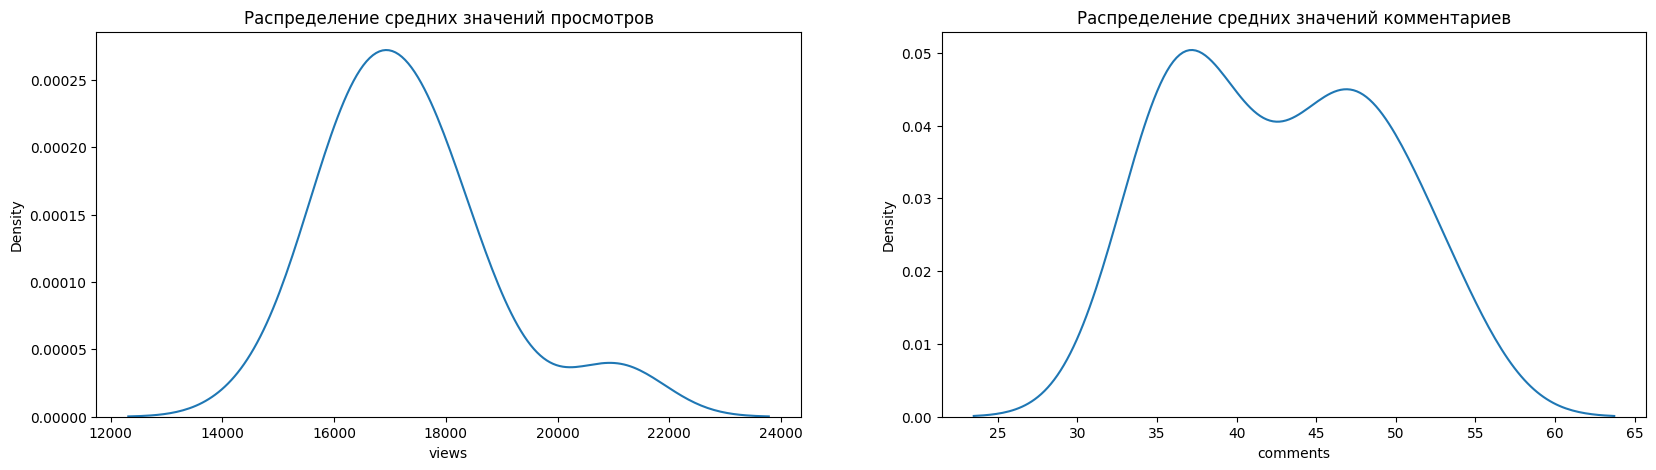

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.kdeplot(a, x='views', ax=axes[0]).set_title('Распределение средних значений просмотров')
sns.kdeplot(a, x='comments', ax=axes[1]).set_title('Распределение средних значений комментариев')

Согласно ЦПТ, распределения выше близки к нормальным, что позволит провести нам параметрические тесты.

# 2. Проверка данных на нормальность

In [45]:
from scipy.stats import normaltest # Тест на нормальность Д'Агостино лучше подходит для больших выборок

alpha = 0.05 # 5% уровень значимости

_, p = normaltest(df[['views', 'favs', 'comments']]) # Тест на нормальность для данных из столбцов "views", "favs" и "comments"

H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально'

for i in range(3):
  if p[i] > alpha / 2:
    print(H0)
  else:
    print(Ha)

Данные не распределены нормально
Данные не распределены нормально
Данные не распределены нормально


Данные из столбцов "views", "favs" и "comments" не распределены нормально.

In [46]:
from scipy.stats import shapiro # Тест на нормальность Шапиро-Уилка лучше подходит для небольших выборок

_, p = shapiro(a[:12]['views']) # Тест на нормальность для просмотров в первой половине дня

if p > alpha:
  print(H0)
else:
  print(Ha)

_, p = shapiro(a[12:]['views']) # Тест на нормальность для просмотров во второй половине дня

if p > alpha:
  print(H0)
else:
  print(Ha)


Данные распределены нормально
Данные распределены нормально


Данные из таблицы средних значений, а именно просмотры в первой и второй половине дня распределены нормально (пригодится для проверки гипотезы).

# 3. Выдвините гипотезы

Выдвинем нулевую гипотезу о том, что между просмотрами и комментариями нет корреляции. Проверка будет проводится при помощи теста Спирмена.

In [47]:
from scipy.stats import spearmanr # Непараметрический (данные не распределены нормально) тест на зависимость между переменными

H0 = 'Нет зависимости между просмотрами и комментариями'
Ha = 'Есть зависимость между просмотрами и комментариями'

corr, p = spearmanr(df['views'], df['comments'])

if p > alpha:
  print(H0)
else:
  print(Ha)
print(corr, p)

Есть зависимость между просмотрами и комментариями
0.27757380644417395 0.0


Тест Спирмена отклонил нулевую гипотезу и принял альтернативную (между просмотрами и комментариями есть корреляция).

Выдвинем нулевую гипотезу об отсутствии значимой разницы между просмотрами в первой и второй половине дня. Проверка будет проводится при помощи T-теста.

In [48]:
from scipy.stats import ttest_ind # Параметрический (данные распределены нормально) тест для небольших (<30) выборок на разницу между их средними значениями

H0 = 'Нет значимой разницы между просмотрами в первой и второй половине дня'
Ha = 'Есть значимая разница между просмотрами в первой и второй половине дня'

result = ttest_ind(a[:12]['views'], a[12:]['views'], equal_var=True)

if result.pvalue > alpha:
  print(H0)
else:
  print(Ha)
print(result.pvalue)

Есть значимая разница между просмотрами в первой и второй половине дня
0.04424414349324601


Т-тест отклонил нулевую гипотезу и принял альтернативную (между просмотрами в первой и второй половине дня есть значимая разница).